In [2]:
import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt
import time
from IPython import display
from IPython.html import widgets
plt.style.use('ggplot')



import numpy as np
import scipy as sp
import torch
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor'] = 'white'


import sys
sys.path.append('conditional_gan/')

import datetime
import warnings


/home/ashray/anaconda3/envs/py37torch1/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


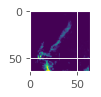

In [3]:
#!/usr/bin/env python
# coding: utf-8



# In[2]:


warnings.filterwarnings('ignore')


# In[3]:


import torch.utils.data
import os.path
import random
import torchvision.transforms as transforms
import numpy as np
from numpy import inf
import matplotlib.gridspec as gridspec
from skimage.transform import rescale, resize, downscale_local_mean
from matplotlib.pyplot import figure


# In[4]:


test_data_input = dict(np.load('datasets/livneh/testA.npz'))
test_data_ouput = dict(np.load('datasets/livneh/testB.npz'))


# In[5]:


starting_day = datetime.date(1900, 1, 1) + datetime.timedelta(days = 37620 + 4018 - 804)


# In[6]:


starting_day


# In[7]:


model_path = "conditional_gan/SavedModels/cGan6Channel"


# In[8]:


test_data_input.keys()


# In[9]:


test_data_input['data'].shape


# In[10]:


test_data_ouput['data'].shape


# In[11]:


data_A = test_data_input['data']
data_B = test_data_ouput['data']


# In[ ]:





# In[12]:


def take_two_weeks(input_data, start_date):
    return input_data[start_date:start_date + 14, :, :, :]


# In[13]:


take_two_weeks(test_data_ouput['data'], 10).shape


# In[14]:


from networks import define_G


# In[15]:


model = define_G(6, 1, 16, 'instance', 'resnet', False, [0])
model


# In[16]:


model.load_state_dict(torch.load(model_path)['netG_A_B'])
model.eval()


# In[17]:


torch.histc(torch.from_numpy(test_data_ouput['data'][1,:,:,:]))


# In[ ]:





# In[18]:


#plt.imshow(model(torch.from_numpy(arr_to_input(data_A[150:151, :, :, :])).cuda()).cpu().detach().numpy()[0,0,:,:])


# In[19]:


figure(num=None, figsize=(1, 1), dpi=80, facecolor='w', edgecolor='k')


# In[20]:


#normalizing data
def arr_to_input(arr):
    arr = np.nan_to_num(arr)
    if arr.ndim == 3:
        arr = np.expand_dims(arr, axis=2)
    means = np.nanmean(arr, axis=(0,1,2))
    # scale and shift to [-1,1]
    arr = -1 + 2 * (arr - arr.min((1,2))[:, np.newaxis,np.newaxis]) / (arr.max((1,2))[:, np.newaxis,np.newaxis] - arr.min((1,2))[:, np.newaxis,np.newaxis])
    arr[np.isnan(arr)] = -1; arr[arr == inf] = -1; arr[arr == -inf] = -1
    if 64 is not None:
        new_arr = []
        #print "Resizing data to %d" % 64
        for x in arr:
            new_arr.append(resize(x, (64,64)))
        arr = np.stack(new_arr)
    # convert data from b,0,1,c to b,c,0,1
    arr = np.transpose(arr, (0,3,1,2))
    
    return arr.astype('float32')


# In[21]:


temp = arr_to_input(data_A[150:151,:,:,:])


# In[22]:


temp[0,1].shape


# In[23]:


temp1 = np.concatenate((temp[0,0], temp[0,1], temp[0,2]))


# In[24]:


temp2 = np.concatenate((temp[0,3], temp[0,4], temp[0,5]))


# In[25]:


plt.imshow(np.concatenate((temp1, temp2), axis = 1))


# In[26]:


temp = arr_to_input(data_B[150:151,:,:,:])


# In[27]:


temp.shape


# In[28]:


plt.imshow(temp[0,0, :,:])


# In[ ]:


def give_data_seq(inputA, inputB, start_date):
    fake_B = model(torch.from_numpy(arr_to_input(take_two_weeks(inputA, start_date))[:,:,:,:]).cuda()).cpu()
    real_B = torch.from_numpy(arr_to_input(take_two_weeks(inputB, start_date)))
    return fake_B, real_B




mask = np.load("OceanMask.npy")
mask = resize(mask.astype(np.float), (64,64))
mask[mask == 1] = np.nan
mask = mask + 1




    
    


# In[47]:


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)






In [4]:
warnings.filterwarnings('ignore')

In [5]:
im1 = np.nan_to_num(np.load('datasets/livneh/trainB/0.npz')['data'])
im2 = np.nan_to_num(np.load('datasets/livneh/trainB/150.npz')['data'])

In [6]:
im1 = im1 / np.max(im1)
im2 = im2 / np.max(im2)

In [6]:
print("hi")

hi


In [7]:
#lets try and implement some of this stuff

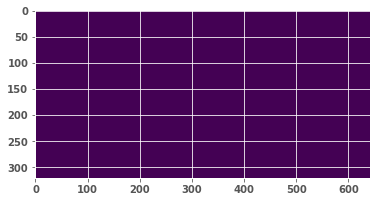

In [83]:
plt.imshow(np.concatenate((np.zeros(im1[:,:,0].shape), np.zeros(im1[:,:,0].shape)), axis=1))

In [1]:
def im_corr(im1, im2):
    #return circular correlation of images 1 and 2:
    if im1.shape != im2.shape:
        print("arrays need to have same shape")
        return None
    corrmat = np.zeros(im1.shape)    
    top = np.concatenate((np.zeros(im2.shape), np.zeros(im2.shape)), axis=1)
    bottom = np.concatenate((im2, np.zeros(im2.shape)), axis = 1)
    
    shiftmat = np.concatenate((top, bottom))
    
    
    corrmat = sp.signal.convolve(im1, shiftmat, 'same')
    return (corrmat - np.min(corrmat))/(np.max(corrmat) - np.min(corrmat))

In [2]:
def im_circcorr(im1, im2):
    #return circular correlation of images 1 and 2:
    if im1.shape != im2.shape:
        print("arrays need to have same shape")
        return None
    corrmat = np.zeros(im1.shape)
    shiftmat = np.tile(im2, (2,2))
    
    corrmat = sp.signal.convolve(im1, shiftmat, 'same')
    return corrmat/np.max(corrmat)

In [23]:


top = np.concatenate((np.zeros(im2.shape), np.zeros(im2.shape)), axis=1)
bottom = np.concatenate((im1, np.zeros(im2.shape)), axis = 1)
    
shiftmat = np.concatenate((top, bottom))

sp.signal.fftconvolve(im1, shiftmat, 'same').shape


(321, 321, 1)

In [128]:
two_point_corr = im_corr(im1, im1)

In [ ]:
sp.signal.convolve2d(im1, im1, 'same')

In [ ]:
plt.imshow(sp.signal.fftconvolve(im1, shiftmat, 'same')/np.max(sp.signal.fftconvolve(im1, shiftmat, 'same')))

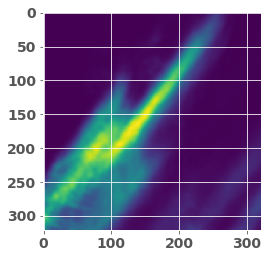

In [8]:
plt.imshow(sp.signal.convolve(im1, im1, 'same')[:,:,0])

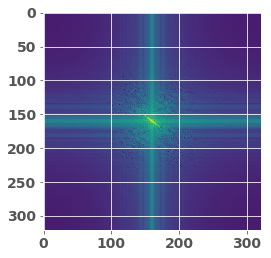

In [9]:
psd=np.log10(abs(np.fft.fftshift(np.fft.fft2(sp.signal.convolve(im1, im1, 'same')[:,:,0]))))*20;
plt.imshow(psd)

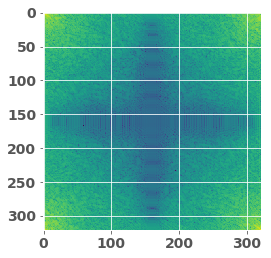

In [10]:
psd1=np.log10(abs(np.fft.fft2(im1[:,:,0])))*20
plt.imshow(psd1)


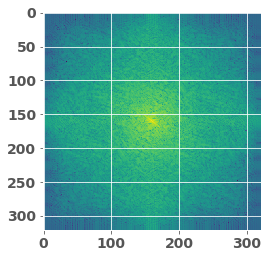

In [11]:
psd1=np.log10(abs(np.fft.fftshift(np.fft.fft2(im1[:,:,0]))))*20
plt.imshow(psd1)


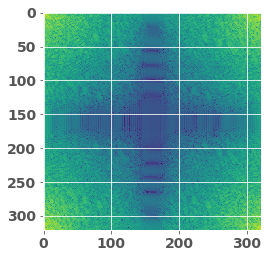

In [12]:
psd2=np.log10(abs(np.fft.fft2(im2[:,:,0])))*20
plt.imshow(psd2)

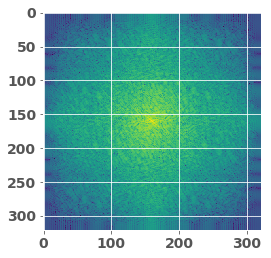

In [13]:
psd2=np.log10(abs(np.fft.fftshift(np.fft.fft2(im2[:,:,0]))))*20
plt.imshow(psd2)

In [143]:
#radial averaging of PSD around center

In [14]:
x,y = np.meshgrid(np.arange(im1.shape[1]),np.arange(im1.shape[0]))
center = (im1.shape[0]//2, im2.shape[0]//2)
x -= center[0]
y -= center[1]

226.27416997969522


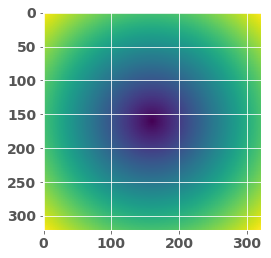

In [15]:
R = np.sqrt(x**2 + y**2)
plt.imshow(R)
print(np.max(R))

In [16]:
distances = np.linspace(0, 228, 228)

In [17]:
def take_radial_slice_mean(image, radius, distances):
    #print(image[(distances >= radius-.5) & (distances < radius+.5)])
    #print(((distances >= radius-.5) & (distances < radius+.5)))
    return image[(distances >= radius-.5) & (distances  < radius+.5)].mean()

In [18]:
R

array([[226.27416998, 225.56817151, 224.86440359, ..., 224.86440359,
        225.56817151, 226.27416998],
       [225.56817151, 224.85995642, 224.15396494, ..., 224.15396494,
        224.85995642, 225.56817151],
       [224.86440359, 224.15396494, 223.44574285, ..., 223.44574285,
        224.15396494, 224.86440359],
       ...,
       [224.86440359, 224.15396494, 223.44574285, ..., 223.44574285,
        224.15396494, 224.86440359],
       [225.56817151, 224.85995642, 224.15396494, ..., 224.15396494,
        224.85995642, 225.56817151],
       [226.27416998, 225.56817151, 224.86440359, ..., 224.86440359,
        225.56817151, 226.27416998]])

(160, 160)


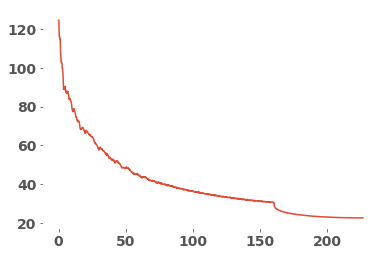

In [19]:


midpoint = (im1.shape[0]//2, im2.shape[0]//2)
print(midpoint)
r  = np.linspace(0,228,num=228*4)
means = []
# plot it
for dist in r:
    #print(dist)
    means.append(take_radial_slice_mean(psd, dist, R))
    
fig,ax=plt.subplots()
ax.plot(r,means)


In [156]:
def power_spectral_density(im):
    #print(im.shape)
    temp = (im - np.mean(im))/np.var(im)
    psd = np.log10(abs(np.fft.fftshift(np.fft.fft2(im_corr(temp, temp)))))*20
    x,y = np.meshgrid(np.arange(im.shape[1]),np.arange(im.shape[1]))
    center = (im.shape[0]//2, im.shape[1]//2)
    x -= center[0]
    y -= center[1]
    R = np.sqrt(x**2 + y**2)
    r  = np.linspace(0,int(np.max(R)),num=int(np.max(R))*4)
    means = []
    # plot it
    for dist in r:
        #print(dist)
        means.append(take_radial_slice_mean(psd, dist, R))
    return means

In [121]:
R

array([[226.27416998, 225.56817151, 224.86440359, ..., 224.86440359,
        225.56817151, 226.27416998],
       [225.56817151, 224.85995642, 224.15396494, ..., 224.15396494,
        224.85995642, 225.56817151],
       [224.86440359, 224.15396494, 223.44574285, ..., 223.44574285,
        224.15396494, 224.86440359],
       ...,
       [224.86440359, 224.15396494, 223.44574285, ..., 223.44574285,
        224.15396494, 224.86440359],
       [225.56817151, 224.85995642, 224.15396494, ..., 224.15396494,
        224.85995642, 225.56817151],
       [226.27416998, 225.56817151, 224.86440359, ..., 224.86440359,
        225.56817151, 226.27416998]])

In [157]:
def take_n_samples_random(data, n):
    image_indices = np.random.choice(804, n)
    return data[image_indices, :,:, :]

In [158]:
def give_data_random(inputA, inputB, num_days):
    fake_B = model(torch.from_numpy(arr_to_input(take_n_samples_random(inputA, num_days))[:,:,:,:]).cuda()).cpu()
    real_B = torch.from_numpy(arr_to_input(take_n_samples_random(inputB, num_days)))
    return fake_B, real_B


In [124]:
fake, real = give_data_random(data_A, data_B, 804)

RuntimeError: CUDA out of memory. Tried to allocate 402.00 MiB (GPU 0; 10.92 GiB total capacity; 9.06 GiB already allocated; 154.88 MiB free; 298.88 MiB cached)

In [ ]:


plt.plot(np.mean(means_fake, axis = 0))
plt.plot(np.max(means_fake, axis = 0))
plt.plot(np.min(means_fake, axis=  0))

In [161]:
def compute_power_spectras(im_list, power):
    radial_means_list = []
    for index in range(0, im_list.shape[0]):
        if index % 100 == 0: 
            print(index)
        if power:
            radial_means_list.append(power_spectral_density(im_list[index, 0, :, :].detach().numpy()))
        else:
            radial_means_list.append(energy_spectral_density(im_list[index, 0, :, :].detach().numpy()))
    return np.array(radial_means_list)


In [ ]:
def plot_spectra_to_tensorboard(radial_means_real, radial_means_fake, log, writer, name, step):
    f = plt.figure(figsize=(30,20))
    f.patch.set_facecolor('white')
    
    
    psd_means_real = np.mean(radial_means_real, axis = 0)
    psd_stds_real = np.var(radial_means_real, axis = 0)**(0.5)
    
    psd_means_fake = np.mean(radial_means_fake, axis = 0)
    psd_stds_fake = np.var(radial_means_fake, axis = 0)**(0.5)
    
    
    x = np.linspace(0, 45.254833995939045, 180)
    y_real = psd_means_real
    error = 1.96 * psd_stds_real
    if log:
        plt.semilogx(x, y_real, 'k', color='#CC4F1B', label = 'Real')
    else:
        plt.plot(x, y_real, 'k', color='#CC4F1B', label = 'Real')
    plt.fill_between(x, y_real-error, y_real+error, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

    y_fake = psd_means_fake   
    error = 1.96 * psd_stds_fake
    if log:
        plt.semilogx(x, y_fake, 'k', color='#1B2ACC', label = 'Generated')
    else:
        plt.plot(x, y_fake, 'k', color='#1B2ACC', label = 'Generated')
    plt.fill_between(x, y_fake-error, y_fake+error, alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF', linewidth=4, linestyle='dashdot', antialiased=True)

    plt.legend()
    
    plt.title("Radial Power Spectral Density of SWE Maps")
    plt.xlabel("Spatial Frequency")
    plt.ylabel("Power Spectrum")
    
    plot_to_tensorboard(writer, name, f, step)

0
100
200
300
400
500
600
700
800


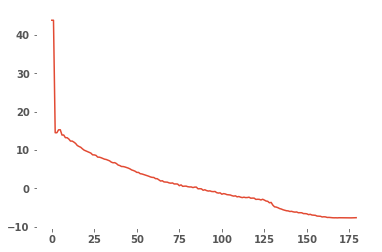

In [162]:
radial_means_real = []
radial_means_fake = []
radial_means_real = compute_power_spectras(real)
radial_means_fake = compute_power_spectras(fake)

psd_means_real = np.mean(radial_means_real, axis = 0)
psd_stds_real = np.var(radial_means_real, axis = 0)**(0.5)

psd_means_fake = np.mean(radial_means_fake, axis = 0)
psd_stds_fake = np.var(radial_means_fake, axis = 0)**(0.5)


# 
# for i in range(0, 804):
#     if i % 100 == 0: print(i)
#     radial_means_fake.append(power_spectral_density(fake[i,0,:,:].detach().numpy()))
# radial_means_fake = np.array(radial_means_fake)

# psd_means_fake = np.mean(radial_means_fake, axis = 0)
# psd_stds_fake = np.var(radial_means_fake, axis = 0)**(0.5)




# plt.plot(np.arange(0, 180), psd_means_fake, 'k-')
# plt.fill_between(np.arange(0, 180), np.mean(means_real, axis = 0)-1.96*np.var(means_real, axis=  0)**(0.5) , np.mean(means_real, axis = 0) + 1.96*np.var(means_real, axis = 0)**(0.5))


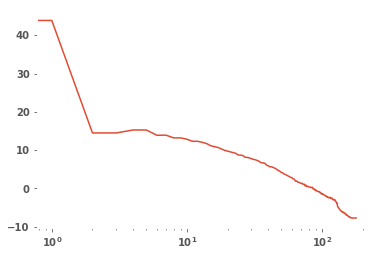

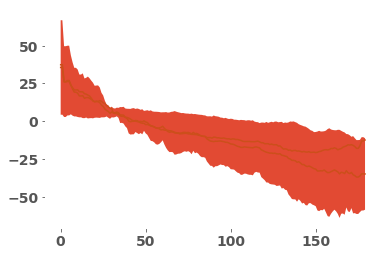

In [188]:
plt.plot(np.arange(0, 180), psd_means_real, 'k-', color='#CC4F1B')
plt.plot(np.arange(0, 180), psd_means_fake, color='#CC4F1B')
plt.fill_between(np.arange(0, 180), np.mean(means_real, axis = 0)-1.96*np.var(means_real, axis=  0)**(0.5) , np.mean(means_real, axis = 0) + 1.96*np.var(means_real, axis = 0)**(0.5))


In [42]:

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

Text(0, 0.5, 'Power Spectrum')

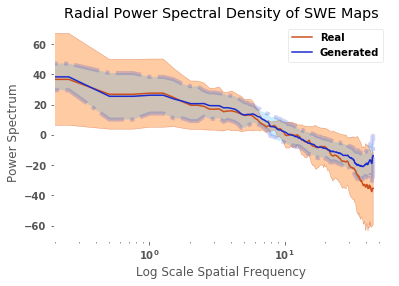

In [49]:



plt.clf()

x = np.linspace(0, 45.254833995939045, 180)
y = psd_means_real
error = 1.96 * psd_stds_real

plt.semilogx(x, y, 'k', color='#CC4F1B', label = 'Real')
plt.fill_between(x, y-error, y+error,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

y = psd_means_fake   
error = 1.96 * psd_stds_fake
plt.semilogx(x, y, 'k', color='#1B2ACC', label = 'Generated')
plt.fill_between(x, y-error, y+error,
    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)

plt.legend()
plt.title("Radial Power Spectral Density of SWE Maps")
plt.xlabel("Log Scale Spatial Frequency")
plt.ylabel("Power Spectrum")

In [134]:
nov = 400

In [135]:
apr = 530

In [136]:
aug = 300

In [204]:
psd_stds_real

array([15.93546209, 15.93546209, 11.93958819, 11.93958819, 11.75872765,
       11.75872765,  9.93484641,  9.00563755,  8.20117842,  8.20117842,
        8.00783562,  7.21846059,  7.21846059,  7.55311276,  6.69599863,
        6.70557824,  7.0640279 ,  6.72912921,  6.32074938,  6.01426901,
        5.3961979 ,  5.41037477,  5.45523159,  5.13885308,  4.13460231,
        3.69823995,  2.78667336,  2.01375883,  2.11686648,  1.82861794,
        1.7994446 ,  1.5694296 ,  1.44892486,  1.4586261 ,  1.68961645,
        2.69295969,  2.64831574,  2.83215194,  3.01579211,  3.25825144,
        4.14583443,  4.3264918 ,  4.389523  ,  4.41500511,  3.89788716,
        4.1494435 ,  4.25172574,  3.91726911,  4.22948409,  3.35398961,
        3.84501131,  4.153351  ,  4.56185993,  5.1567769 ,  5.02005279,
        5.16320834,  5.47722317,  5.53719352,  5.38700229,  5.04140303,
        4.72800313,  5.43343563,  6.03771293,  6.38348629,  6.692161  ,
        6.76490541,  6.84978822,  7.36139214,  7.2142538 ,  7.00

In [ ]:
fake, real = give_data_random(data_A, data_B, apr)